### RFM 분석 실습
- Recency: 얼마나 최근에 구매했는가
- Frequency: 얼마나 자주 구매했는가
- Monetary: 얼마나 많은 금액을 지출했는가

 ### 고객 분석
- InvoiceNo: 거래 번호
- StockCode: 상품 코드
- Description: 상품명 
- InvoiceDate: 거래 날짜
- UnitPrice: 상품 단가
- CustomerID: 고객 번호
- Country: 국가


In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('./datasets/customer_invoice_data.csv')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [3]:
# 결측치 확인
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [4]:
df[df['Description'].isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,12/1/2010 14:32,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,12/1/2010 14:34,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,12/7/2011 18:26,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,12/7/2011 18:31,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,12/7/2011 18:35,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,12/8/2011 10:33,0.0,NaN,United Kingdom


In [5]:
# 칼럼명 변경
df.columns = ['trade_code','product_code', 'product_name', 'quantity' ,'date', 'price', 'client_id', 'country']
df

,trade_code,product_code,product_name,quantity,date,price,client_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [6]:
df.groupby('trade_code')['client_id'].count()

trade_code
536365      7
536366      2
536367     12
536368      4
536369      1
           ..
C581484     1
C581490     2
C581499     1
C581568     1
C581569     2
Name: client_id, Length: 25900, dtype: int64

In [7]:
# trade_code 결측치 검사
isnull = df[df['client_id'].isna()]

In [8]:
isnull_df = isnull.groupby('trade_code').mean('quantity').reset_index()

In [9]:
# trade_code 중복 검사
isnull_df.duplicated('trade_code').sum()

0

In [10]:
# 하나의 주분번호 사용자가 여러번 주분했는지 확인
grouped_df = df.groupby('trade_code')['client_id'].apply(list).reset_index()
grouped_df

,trade_code,client_id
0,536365,"[17850.0, 17850.0, 17850.0, 17850.0, 17850.0, ..."
1,536366,"[17850.0, 17850.0]"
2,536367,"[13047.0, 13047.0, 13047.0, 13047.0, 13047.0, ..."
3,536368,"[13047.0, 13047.0, 13047.0, 13047.0]"
4,536369,[13047.0]
...,...,...
25895,C581484,[16446.0]
25896,C581490,"[14397.0, 14397.0]"
25897,C581499,[15498.0]
25898,C581568,[15311.0]


In [11]:
# 하나의 하나의 트레이드코드에 결측치인 사용자의 아이디가 있는지 확인
nan_client_id_df = grouped_df[grouped_df['client_id'].apply(lambda x: any(pd.isna(id) for id in x) and any(not pd.isna(id) for id in x))]
print(nan_client_id_df)

Empty DataFrame
Columns: [trade_code, client_id]
Index: []


In [12]:
# 사용자의 아이디가 결측치인 데이터를 제외
df = df[~df['client_id'].isna()]
df

,trade_code,product_code,product_name,quantity,date,price,client_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [13]:
# 필요가 없는 product_name칼럼 제거
df = df.drop(columns=['product_name'], axis=1)
df

,trade_code,product_code,quantity,date,price,client_id,country
0,536365,85123A,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
541904,581587,22613,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,4,12/9/2011 12:50,4.15,12680.0,France


In [14]:
# 수량이 0개 미만인 데이터는 잘못된 데이터라 판단하고 제외
df = df[df['quantity'] > 0]
df

,trade_code,product_code,quantity,date,price,client_id,country
0,536365,85123A,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
541904,581587,22613,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,4,12/9/2011 12:50,4.15,12680.0,France


In [15]:
# 가격이 0인 데이터들 확인
df[df['price'] == 0.0]

,trade_code,product_code,quantity,date,price,client_id,country
9302,537197,22841,1,12/5/2010 14:02,0.0,12647.0,Germany
33576,539263,22580,4,12/16/2010 14:36,0.0,16560.0,United Kingdom
40089,539722,22423,10,12/21/2010 13:45,0.0,14911.0,EIRE
47068,540372,22090,24,1/6/2011 16:41,0.0,13081.0,United Kingdom
47070,540372,22553,24,1/6/2011 16:41,0.0,13081.0,United Kingdom
56674,541109,22168,1,1/13/2011 15:10,0.0,15107.0,United Kingdom
86789,543599,84535B,16,2/10/2011 13:08,0.0,17560.0,United Kingdom
130188,547417,22062,36,3/23/2011 10:25,0.0,13239.0,United Kingdom
139453,548318,22055,5,3/30/2011 12:45,0.0,13113.0,United Kingdom
145208,548871,22162,2,4/4/2011 14:42,0.0,14410.0,United Kingdom


In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
quantity,397924.0,13.021823,180.420210,1.0,2.00,6.00,12.00,80995.00
price,397924.0,3.116174,22.096788,0.0,1.25,1.95,3.75,8142.75
client_id,397924.0,15294.315171,1713.169877,12346.0,13969.00,15159.00,16795.00,18287.00


In [17]:
# 중앙값으로 가격이 0원인 데이터들을 대체

df.loc[df['price'] == 0.0, 'price'] = df['price'].median()
df

,trade_code,product_code,quantity,date,price,client_id,country
0,536365,85123A,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
541904,581587,22613,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,4,12/9/2011 12:50,4.15,12680.0,France


In [18]:
# 잘되었는지 다시 확인
df[df['price'] == 0.0]

,trade_code,product_code,quantity,date,price,client_id,country


In [19]:
# 최종 결측치 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397924 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   trade_code    397924 non-null  object 
 1   product_code  397924 non-null  object 
 2   quantity      397924 non-null  int64  
 3   date          397924 non-null  object 
 4   price         397924 non-null  float64
 5   client_id     397924 non-null  float64
 6   country       397924 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 24.3+ MB


In [20]:
# 주문별 총수량 확인
sum_df = df.groupby('trade_code').sum('quantity').reset_index()
display(sum_df)

,trade_code,quantity,price,client_id
0,536365,40,27.37,124950.0
1,536366,12,3.70,35700.0
2,536367,83,58.24,156564.0
3,536368,15,19.10,52188.0
4,536369,3,5.95,13047.0
...,...,...,...,...
18531,581583,76,3.30,27554.0
18532,581584,120,2.57,27554.0
18533,581585,278,37.78,331884.0
18534,581586,66,20.23,52452.0


In [21]:
#원본 데이터를 건들일시 성능하락 경고에러 발생함으로 복제해 사용
df = df.copy()
df['date'] = pd.to_datetime(df['date'])
df


,trade_code,product_code,quantity,date,price,client_id,country
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
541904,581587,22613,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,4,2011-12-09 12:50:00,4.15,12680.0,France


In [22]:
# Recency를 구하는 로직
reference_date = pd.to_datetime(df['date'].max())
df['Recency'] = (reference_date - pd.to_datetime(df['date'])).dt.days
df

,trade_code,product_code,quantity,date,price,client_id,country,Recency
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,373
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,373
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,373
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,373
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,373
...,...,...,...,...,...,...,...,...
541904,581587,22613,12,2011-12-09 12:50:00,0.85,12680.0,France,0
541905,581587,22899,6,2011-12-09 12:50:00,2.10,12680.0,France,0
541906,581587,23254,4,2011-12-09 12:50:00,4.15,12680.0,France,0
541907,581587,23255,4,2011-12-09 12:50:00,4.15,12680.0,France,0


In [23]:
# min을 사용하여 최근 일자 넣어주기
rfm_r = df.groupby('client_id')['Recency'].min().reset_index()
rfm_r

,client_id,Recency
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309
...,...,...
4334,18280.0,277
4335,18281.0,180
4336,18282.0,7
4337,18283.0,3


In [24]:
# Frequency를 구하는 로직
rfm_f = df['client_id'].value_counts().reset_index(name='Frequency')
rfm_f

,client_id,Frequency
0,17841.0,7847
1,14911.0,5677
2,14096.0,5111
3,12748.0,4596
4,14606.0,2700
...,...,...
4334,15313.0,1
4335,17846.0,1
4336,13185.0,1
4337,16953.0,1


In [25]:
# 총 구매 금액 구하는 로직
df['total'] = df['price'] * df['quantity']
df

,trade_code,product_code,quantity,date,price,client_id,country,Recency,total
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,373,15.30
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,373,20.34
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,373,22.00
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,373,20.34
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,373,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,12,2011-12-09 12:50:00,0.85,12680.0,France,0,10.20
541905,581587,22899,6,2011-12-09 12:50:00,2.10,12680.0,France,0,12.60
541906,581587,23254,4,2011-12-09 12:50:00,4.15,12680.0,France,0,16.60
541907,581587,23255,4,2011-12-09 12:50:00,4.15,12680.0,France,0,16.60


In [26]:
# Monetary 구하는 로직
rfm_m = df.groupby('client_id')['total'].sum().reset_index(name='Monetary')
rfm_m

,client_id,Monetary
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4334,18280.0,180.60
4335,18281.0,80.82
4336,18282.0,178.05
4337,18283.0,2094.88


In [27]:
rfm = pd.merge(rfm_r, rfm_f, on='client_id')
rfm = pd.merge(rfm, rfm_m, on='client_id')
rfm


,client_id,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,1,182,4310.00
2,12348.0,74,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,309,17,334.40
...,...,...,...,...
4334,18280.0,277,10,180.60
4335,18281.0,180,7,80.82
4336,18282.0,7,12,178.05
4337,18283.0,3,756,2094.88


In [28]:
rfm['TotalScore'] = rfm[['Recency', 'Frequency', 'Monetary']].sum(axis=1)
rfm

,client_id,Recency,Frequency,Monetary,TotalScore
0,12346.0,325,1,77183.60,77509.60
1,12347.0,1,182,4310.00,4493.00
2,12348.0,74,31,1797.24,1902.24
3,12349.0,18,73,1757.55,1848.55
4,12350.0,309,17,334.40,660.40
...,...,...,...,...,...
4334,18280.0,277,10,180.60,467.60
4335,18281.0,180,7,80.82,267.82
4336,18282.0,7,12,178.05,197.05
4337,18283.0,3,756,2094.88,2853.88


In [29]:
df.groupby('client_id').value_counts().reset_index()['country']

0         United Kingdom
1                Iceland
2                Iceland
3                Iceland
4                Iceland
               ...      
392725    United Kingdom
392726    United Kingdom
392727    United Kingdom
392728    United Kingdom
392729    United Kingdom
Name: country, Length: 392730, dtype: object

In [30]:
df['client_id'].value_counts()

client_id
17841.0    7847
14911.0    5677
14096.0    5111
12748.0    4596
14606.0    2700
           ... 
15313.0       1
17846.0       1
13185.0       1
16953.0       1
16737.0       1
Name: count, Length: 4339, dtype: int64

In [31]:
# 사용자별 같은지역 구매횟수가 궁금해 그냥 출력해보기
rfm['CountryCount'] = df.groupby('client_id')['country'].apply(lambda x: x.count()).reset_index()['country']
rfm

,client_id,Recency,Frequency,Monetary,TotalScore,CountryCount
0,12346.0,325,1,77183.60,77509.60,1
1,12347.0,1,182,4310.00,4493.00,182
2,12348.0,74,31,1797.24,1902.24,31
3,12349.0,18,73,1757.55,1848.55,73
4,12350.0,309,17,334.40,660.40,17
...,...,...,...,...,...,...
4334,18280.0,277,10,180.60,467.60,10
4335,18281.0,180,7,80.82,267.82,7
4336,18282.0,7,12,178.05,197.05,12
4337,18283.0,3,756,2094.88,2853.88,756


In [50]:
rfm['CountryCount'].max()

7847

In [32]:
# Country 중복 제거
rfm['Country'] = df.groupby('client_id')['country'].value_counts().reset_index()['country']
rfm

,client_id,Recency,Frequency,Monetary,TotalScore,CountryCount,Country
0,12346.0,325,1,77183.60,77509.60,1,United Kingdom
1,12347.0,1,182,4310.00,4493.00,182,Iceland
2,12348.0,74,31,1797.24,1902.24,31,Finland
3,12349.0,18,73,1757.55,1848.55,73,Italy
4,12350.0,309,17,334.40,660.40,17,Norway
...,...,...,...,...,...,...,...
4334,18280.0,277,10,180.60,467.60,10,United Kingdom
4335,18281.0,180,7,80.82,267.82,7,United Kingdom
4336,18282.0,7,12,178.05,197.05,12,United Kingdom
4337,18283.0,3,756,2094.88,2853.88,756,United Kingdom


In [33]:
# 정규화 작업 진행
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
rfm[['Recency', 'Frequency', 'Monetary']] = \
                                    scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

In [34]:
rfm['Recency'] = 1 - rfm['Recency']
rfm

,client_id,Recency,Frequency,Monetary,TotalScore,CountryCount,Country
0,12346.0,0.128686,0.000000,0.274344,77509.60,1,United Kingdom
1,12347.0,0.997319,0.023069,0.015307,4493.00,182,Iceland
2,12348.0,0.801609,0.003824,0.006375,1902.24,31,Finland
3,12349.0,0.951743,0.009177,0.006234,1848.55,73,Italy
4,12350.0,0.171582,0.002039,0.001175,660.40,17,Norway
...,...,...,...,...,...,...,...
4334,18280.0,0.257373,0.001147,0.000629,467.60,10,United Kingdom
4335,18281.0,0.517426,0.000765,0.000274,267.82,7,United Kingdom
4336,18282.0,0.981233,0.001402,0.000620,197.05,12,United Kingdom
4337,18283.0,0.991957,0.096227,0.007433,2853.88,756,United Kingdom


In [35]:
df

,trade_code,product_code,quantity,date,price,client_id,country,Recency,total
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,373,15.30
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,373,20.34
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,373,22.00
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,373,20.34
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,373,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,12,2011-12-09 12:50:00,0.85,12680.0,France,0,10.20
541905,581587,22899,6,2011-12-09 12:50:00,2.10,12680.0,France,0,12.60
541906,581587,23254,4,2011-12-09 12:50:00,4.15,12680.0,France,0,16.60
541907,581587,23255,4,2011-12-09 12:50:00,4.15,12680.0,France,0,16.60


In [36]:
# 회원 등급 나누기
import numpy as np

l1, l2, l3 = np.percentile(rfm['TotalScore'], [20, 60, 90])
print(l1, l2, l3)

422.154 1084.178 3879.020000000001


In [37]:
def get_level(x):
    if x <= l1:
        return 4
    if x <= l2:
        return 3
    if x <= l3:
        return 2
    return 1

In [38]:
rfm['Level'] = rfm['TotalScore'].apply(get_level)
rfm

,client_id,Recency,Frequency,Monetary,TotalScore,CountryCount,Country,Level
0,12346.0,0.128686,0.000000,0.274344,77509.60,1,United Kingdom,1
1,12347.0,0.997319,0.023069,0.015307,4493.00,182,Iceland,1
2,12348.0,0.801609,0.003824,0.006375,1902.24,31,Finland,2
3,12349.0,0.951743,0.009177,0.006234,1848.55,73,Italy,2
4,12350.0,0.171582,0.002039,0.001175,660.40,17,Norway,3
...,...,...,...,...,...,...,...,...
4334,18280.0,0.257373,0.001147,0.000629,467.60,10,United Kingdom,3
4335,18281.0,0.517426,0.000765,0.000274,267.82,7,United Kingdom,4
4336,18282.0,0.981233,0.001402,0.000620,197.05,12,United Kingdom,4
4337,18283.0,0.991957,0.096227,0.007433,2853.88,756,United Kingdom,2


In [39]:
rfm['Level'] = rfm['Level'].replace([4, 3, 2, 1], ['Iron', 'Bronze', 'Silver', 'Gold'])
rfm

,client_id,Recency,Frequency,Monetary,TotalScore,CountryCount,Country,Level
0,12346.0,0.128686,0.000000,0.274344,77509.60,1,United Kingdom,Gold
1,12347.0,0.997319,0.023069,0.015307,4493.00,182,Iceland,Gold
2,12348.0,0.801609,0.003824,0.006375,1902.24,31,Finland,Silver
3,12349.0,0.951743,0.009177,0.006234,1848.55,73,Italy,Silver
4,12350.0,0.171582,0.002039,0.001175,660.40,17,Norway,Bronze
...,...,...,...,...,...,...,...,...
4334,18280.0,0.257373,0.001147,0.000629,467.60,10,United Kingdom,Bronze
4335,18281.0,0.517426,0.000765,0.000274,267.82,7,United Kingdom,Iron
4336,18282.0,0.981233,0.001402,0.000620,197.05,12,United Kingdom,Iron
4337,18283.0,0.991957,0.096227,0.007433,2853.88,756,United Kingdom,Silver


In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

order = ['Iron', 'Bronze', 'Silver', 'Gold']

print(rfm['Level'].value_counts())

Level
Bronze    1735
Silver    1302
Iron       868
Gold       434
Name: count, dtype: int64


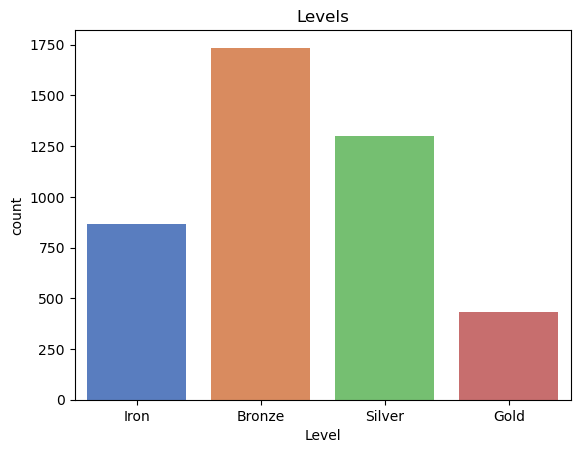

In [41]:
sns.countplot(x='Level', data=rfm, palette='muted', order=order)
plt.title('Levels')
plt.show()

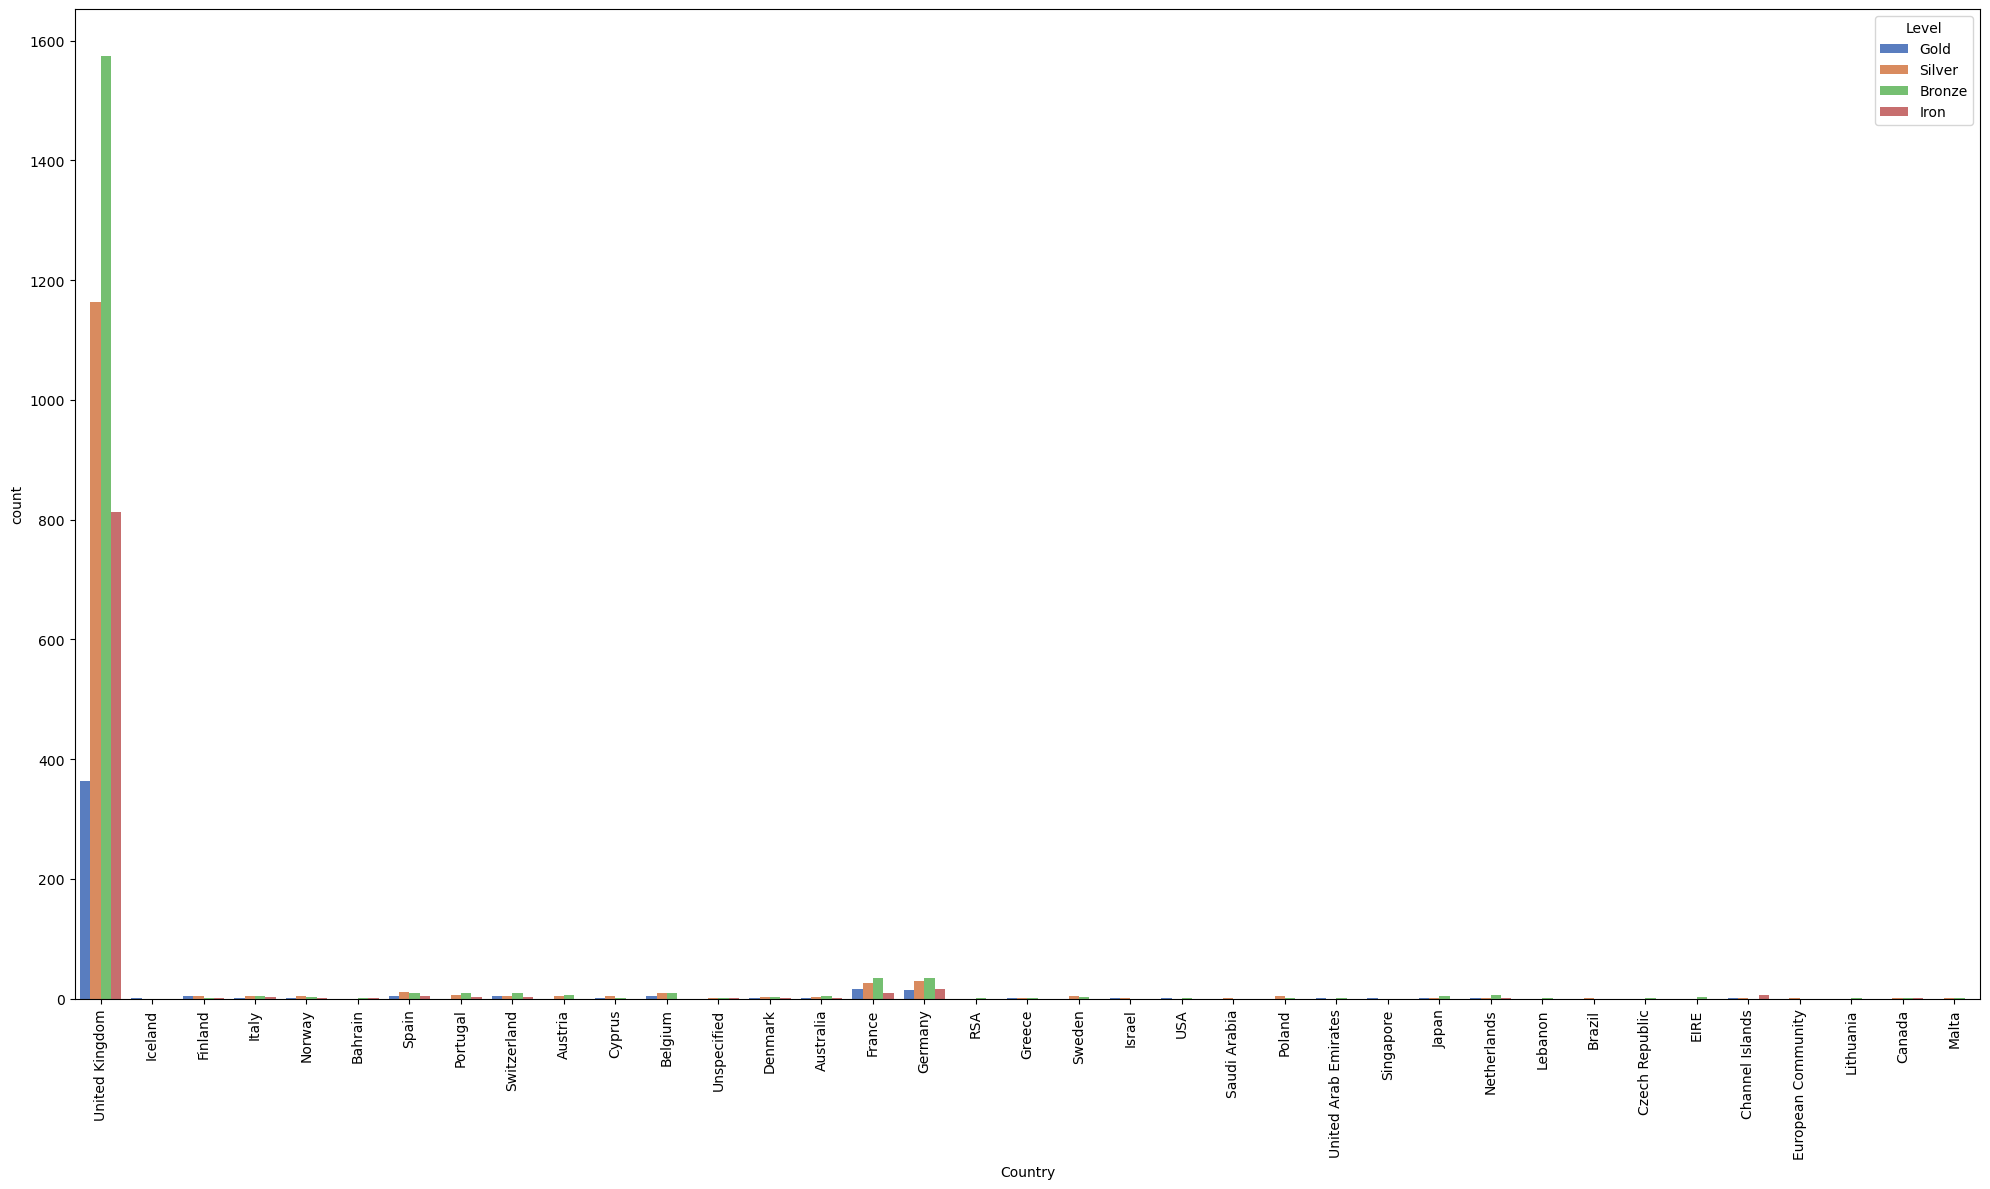

In [42]:
fig, axes = plt.subplots(1, 1, figsize=(20, 12))

sns.countplot(ax=axes, x='Country', hue='Level', data=rfm, palette='muted')
axes.set_xlabel('Country')
axes.set_xticklabels(axes.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

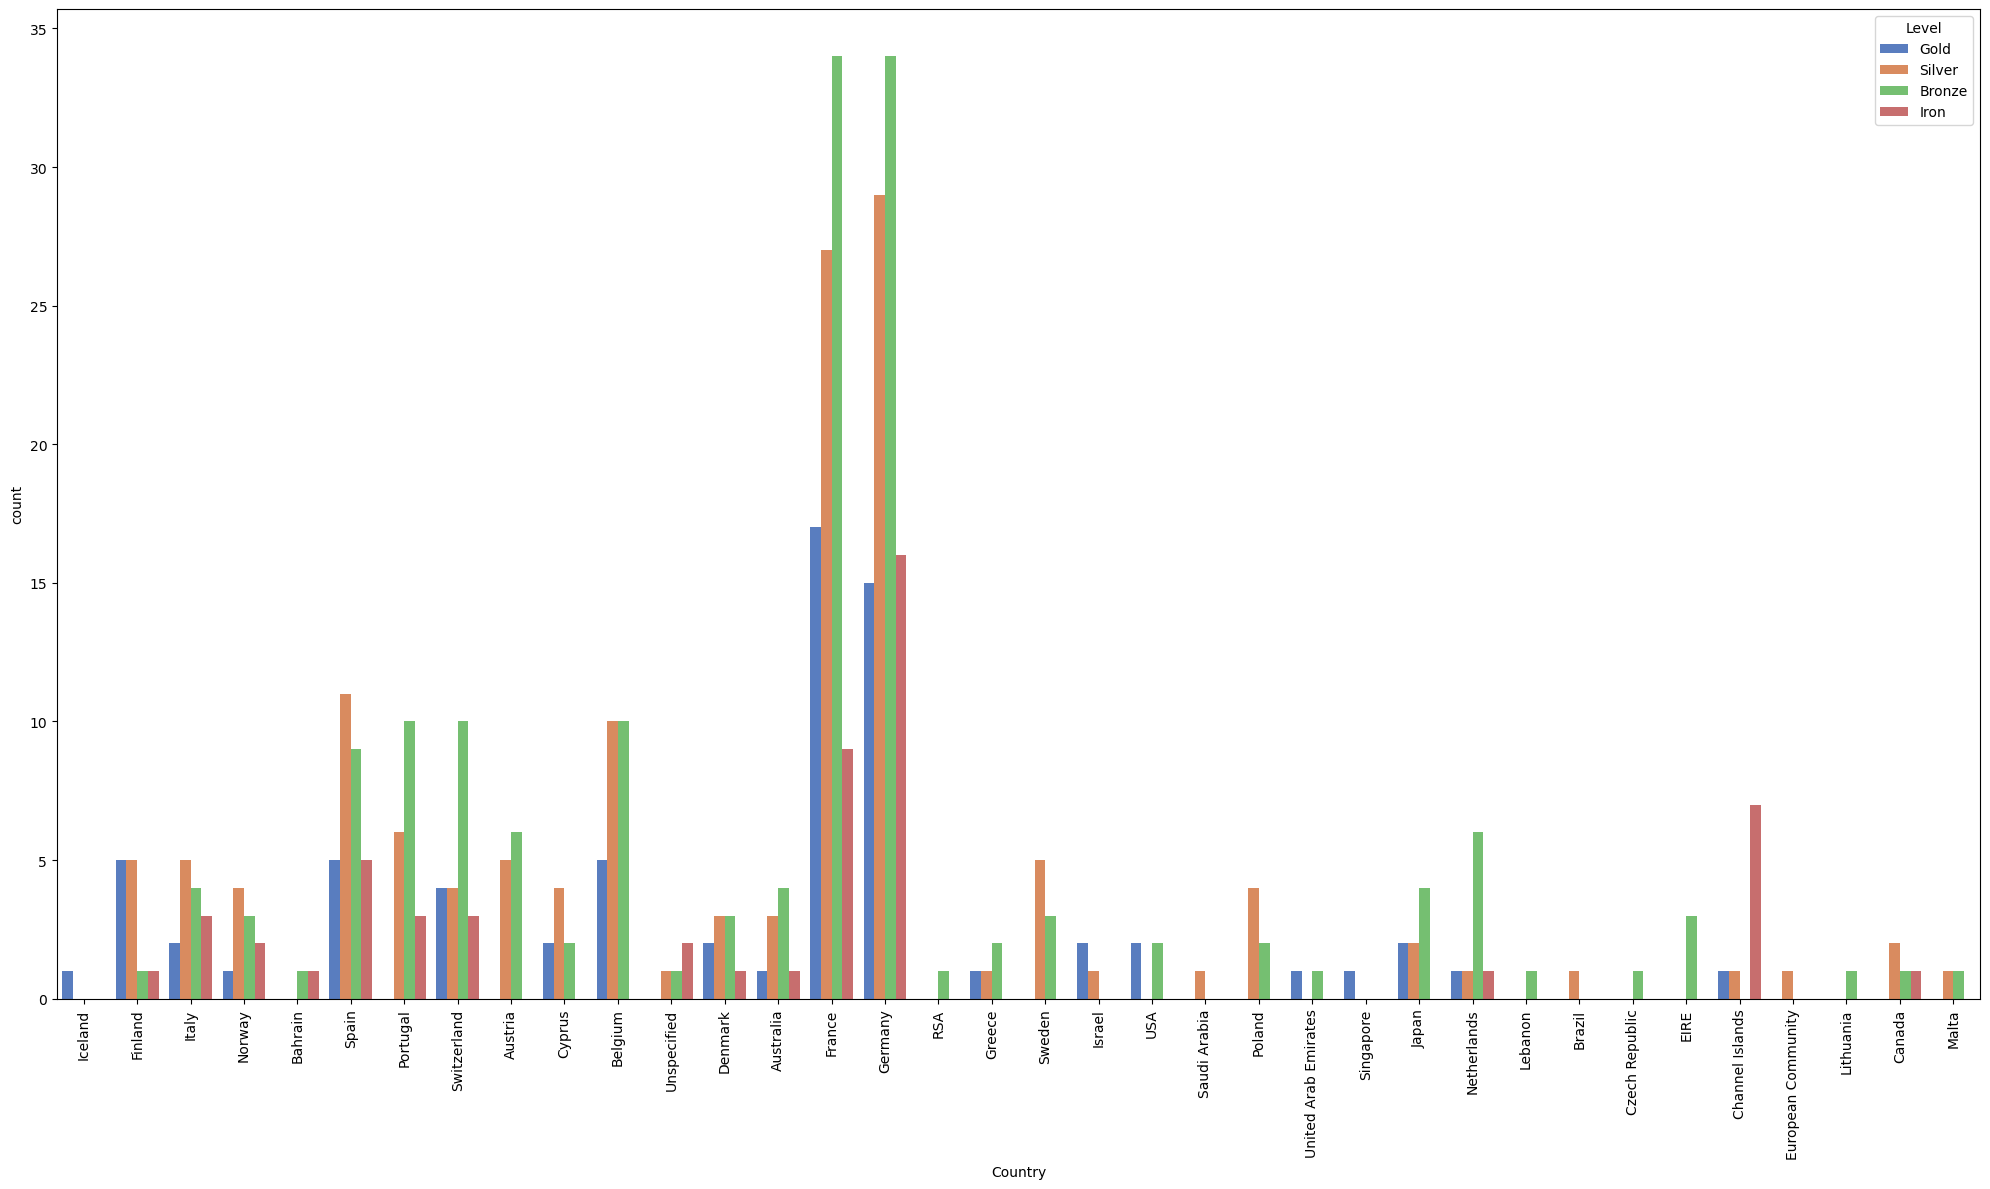

In [43]:
rfm_without_uk = rfm[rfm['Country'] != 'United Kingdom']

# 새로운 countplot 생성
fig, axes = plt.subplots(1, 1, figsize=(20, 12))
sns.countplot(ax=axes, x='Country', hue='Level', data=rfm_without_uk, palette='muted')
axes.set_xlabel('Country')
axes.set_xticklabels(axes.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

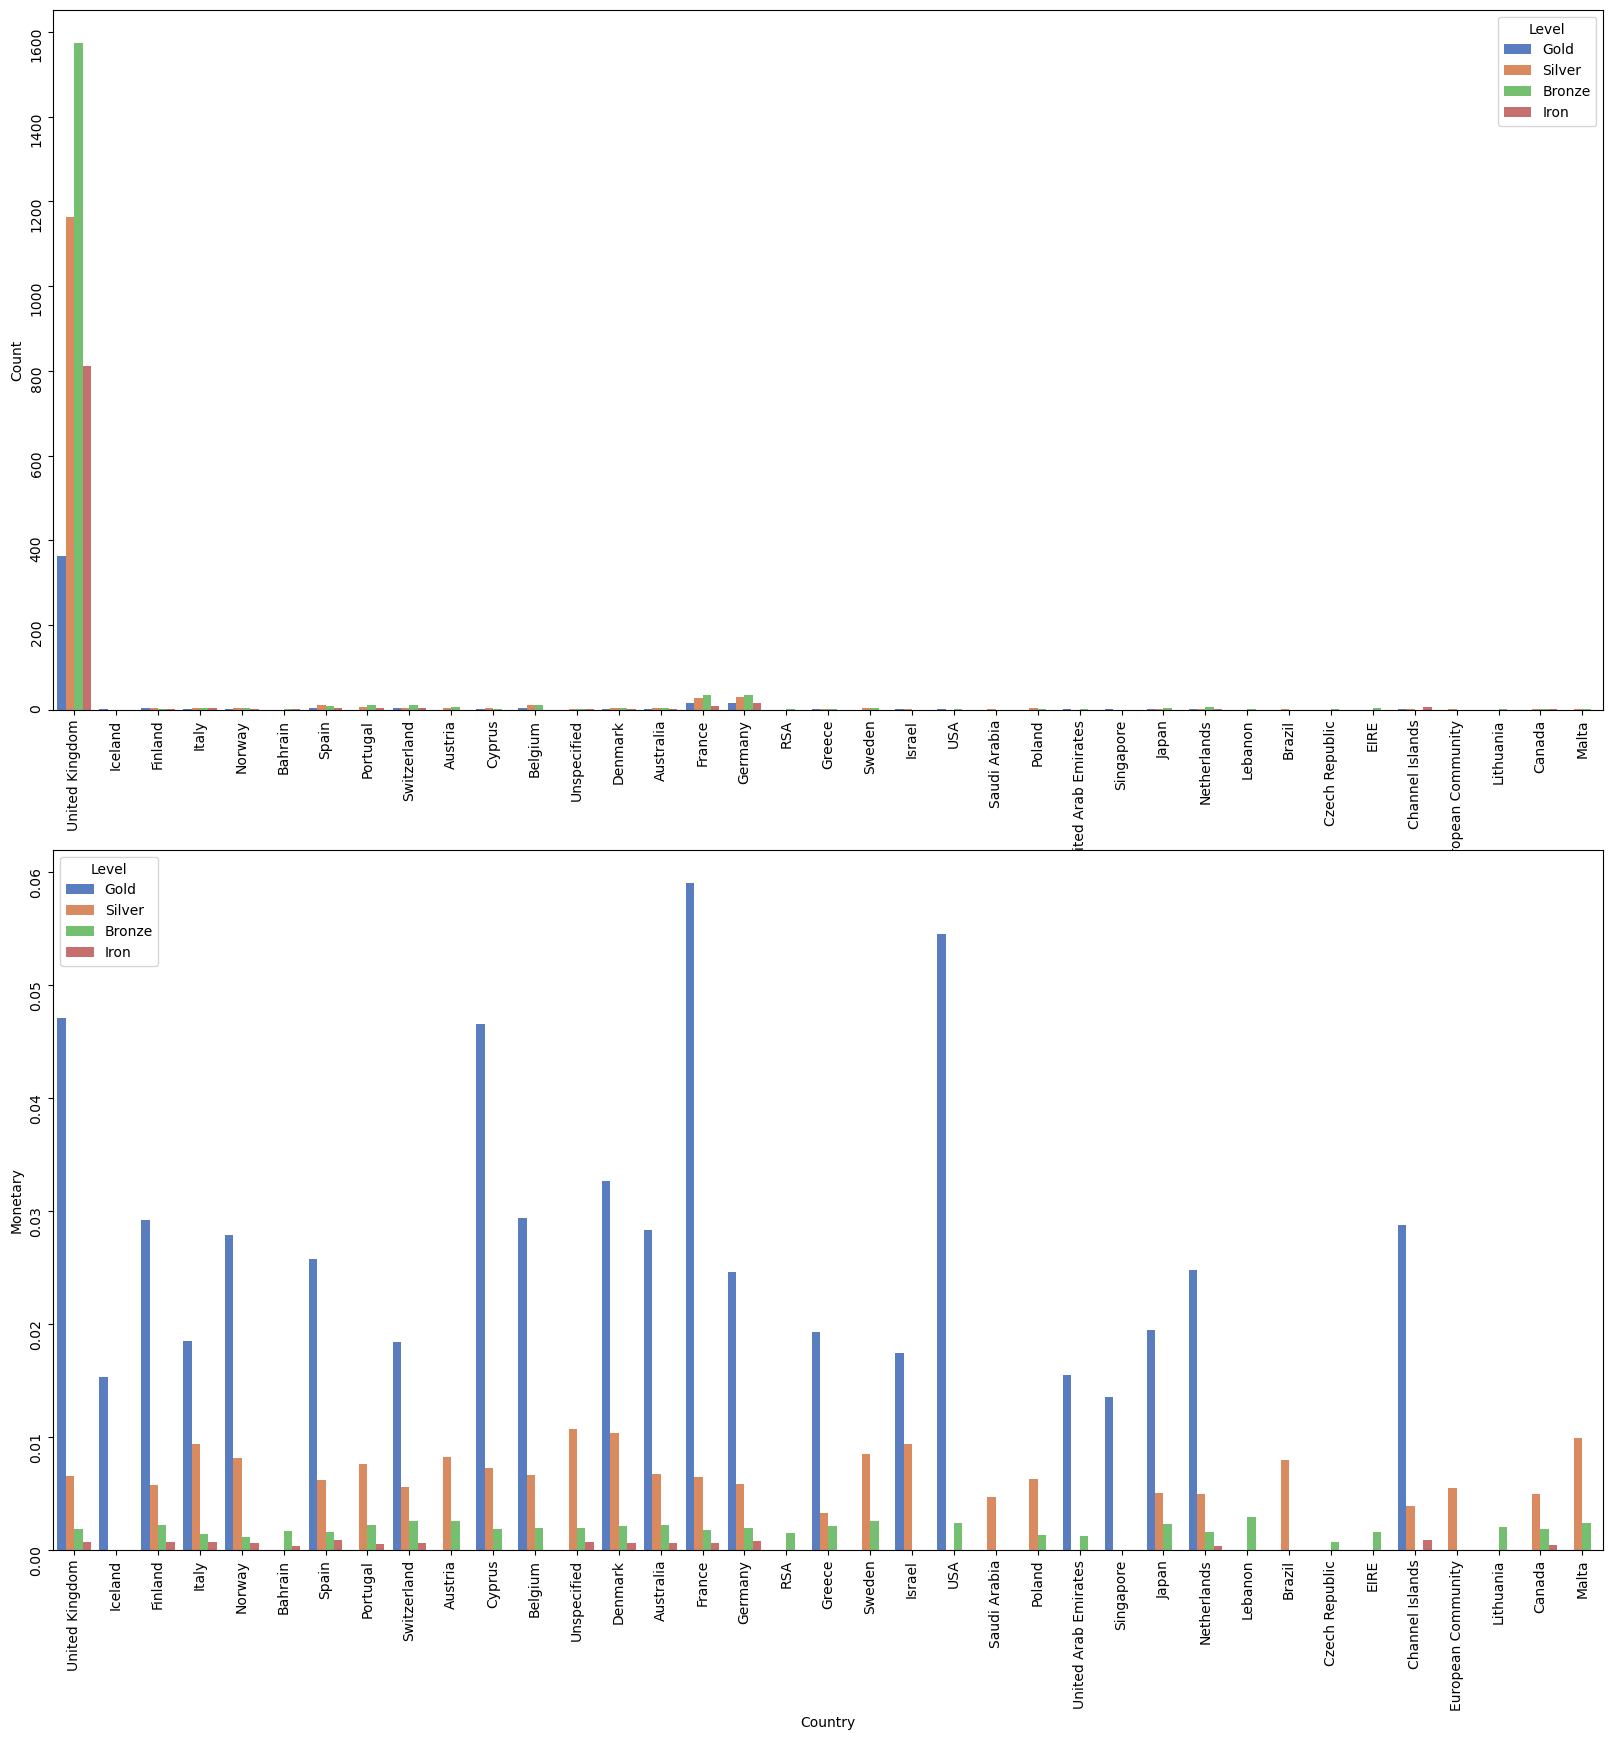

In [44]:
fig, axes = plt.subplots(2, 1, figsize=(20, 20))

sns.countplot(ax=axes[0], x='Country', hue='Level', data=rfm, palette='muted')
axes[0].set_ylabel('Count')
axes[0].tick_params(rotation=90)  

sns.barplot(ax=axes[1], x='Country', y='Monetary', hue='Level', data=rfm, palette='muted', errorbar=None)
axes[1].tick_params(rotation=90)  

plt.show()

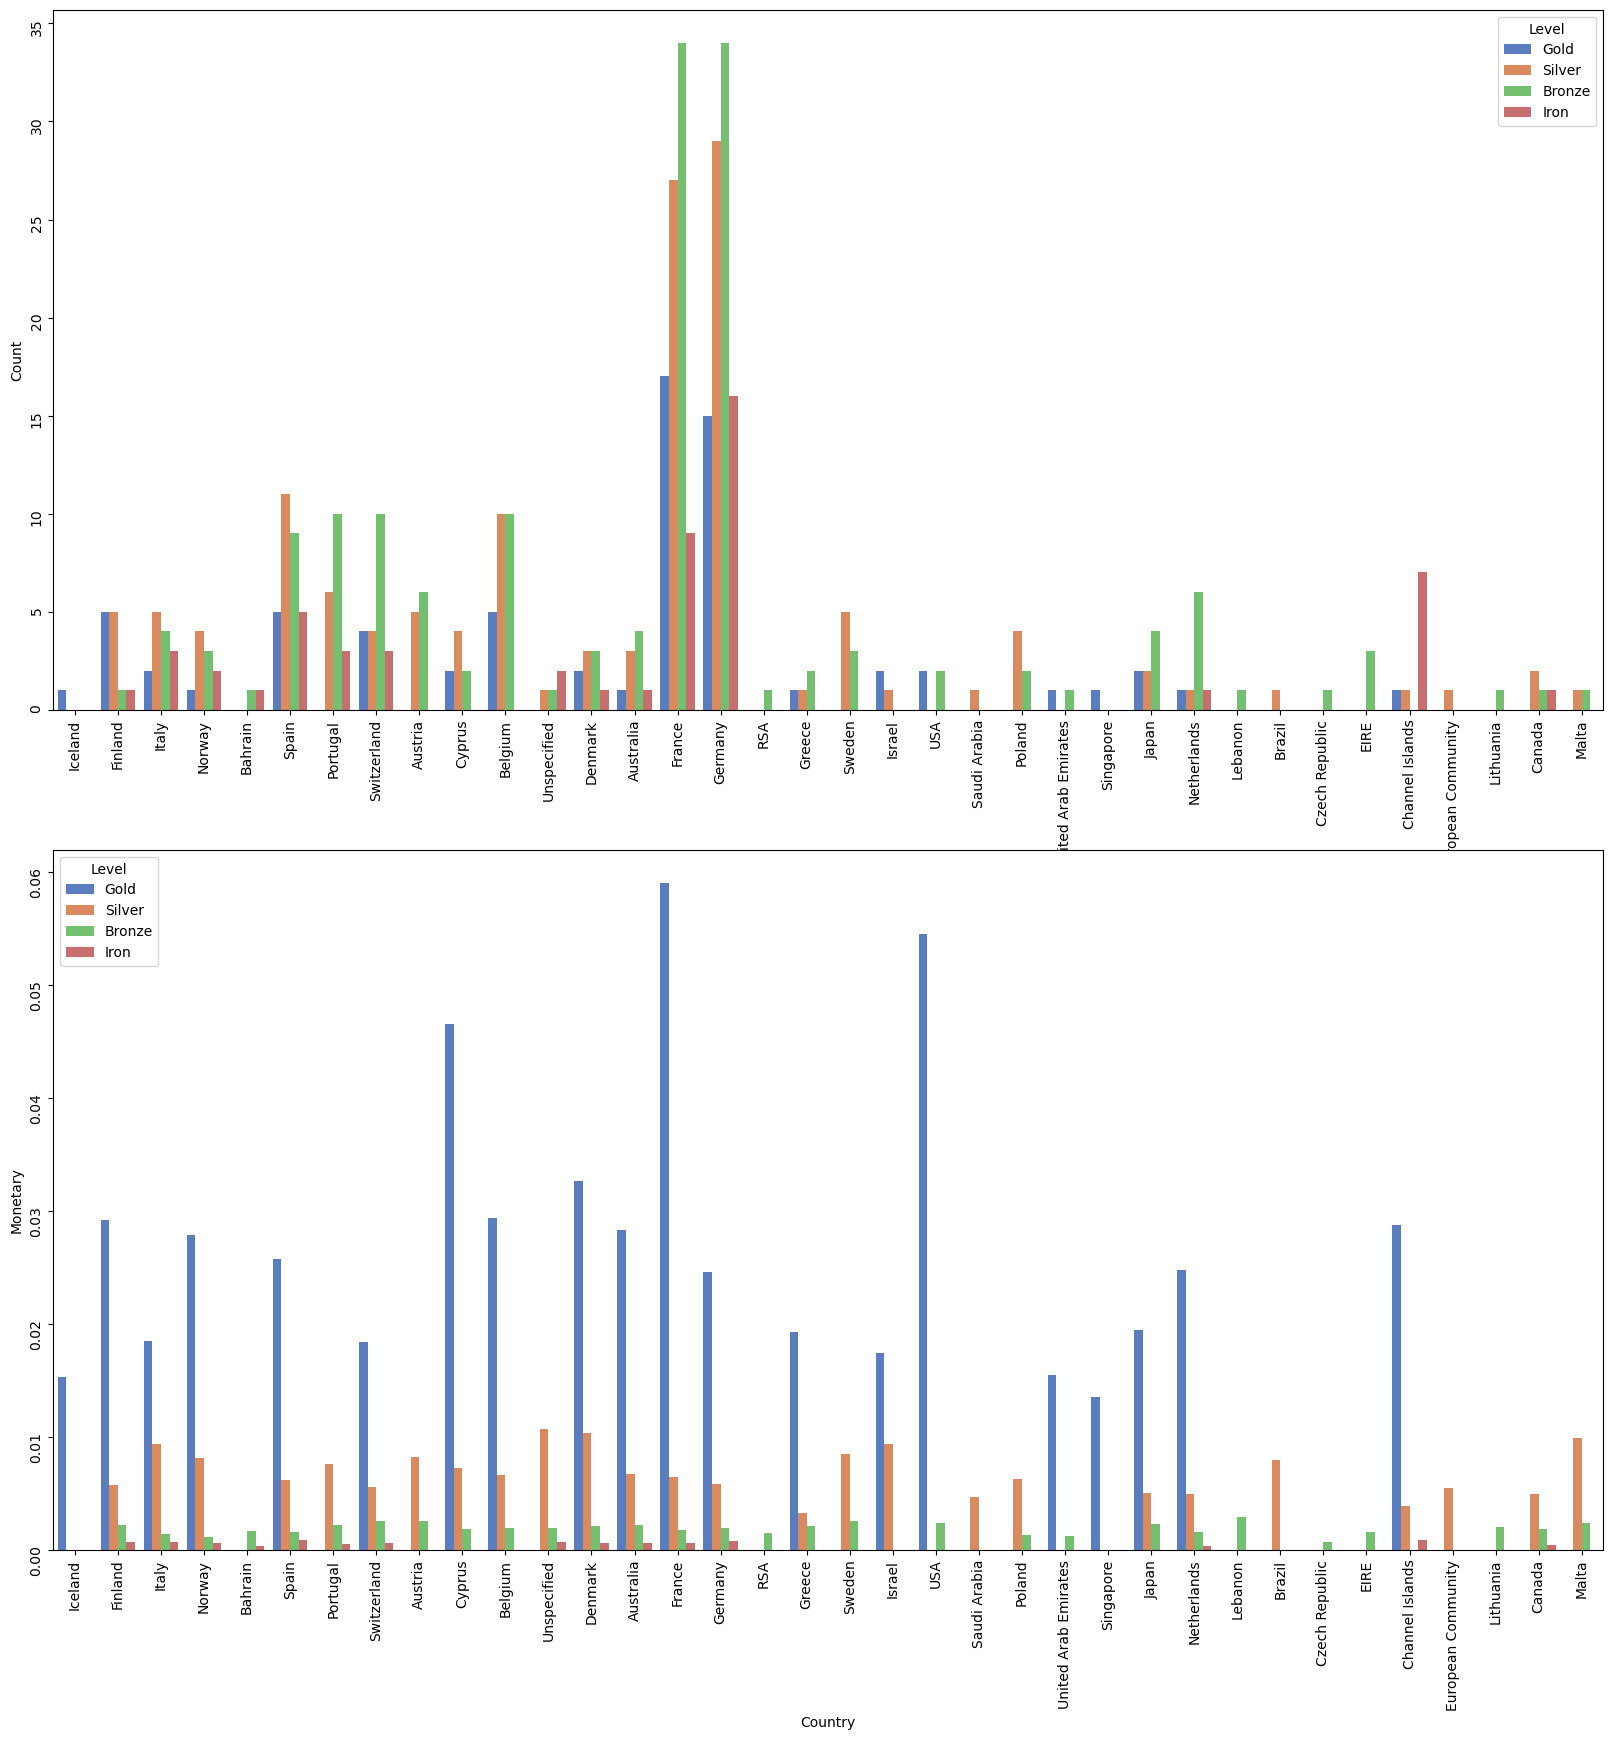

In [45]:
fig, axes = plt.subplots(2, 1, figsize=(20, 20))

sns.countplot(ax=axes[0], x='Country', hue='Level', data=rfm_without_uk, palette='muted')
axes[0].set_ylabel('Count')
axes[0].tick_params(rotation=90)  

sns.barplot(ax=axes[1], x='Country', y='Monetary', hue='Level', data=rfm_without_uk, palette='muted', errorbar=None)
axes[1].tick_params(rotation=90)  

plt.show()

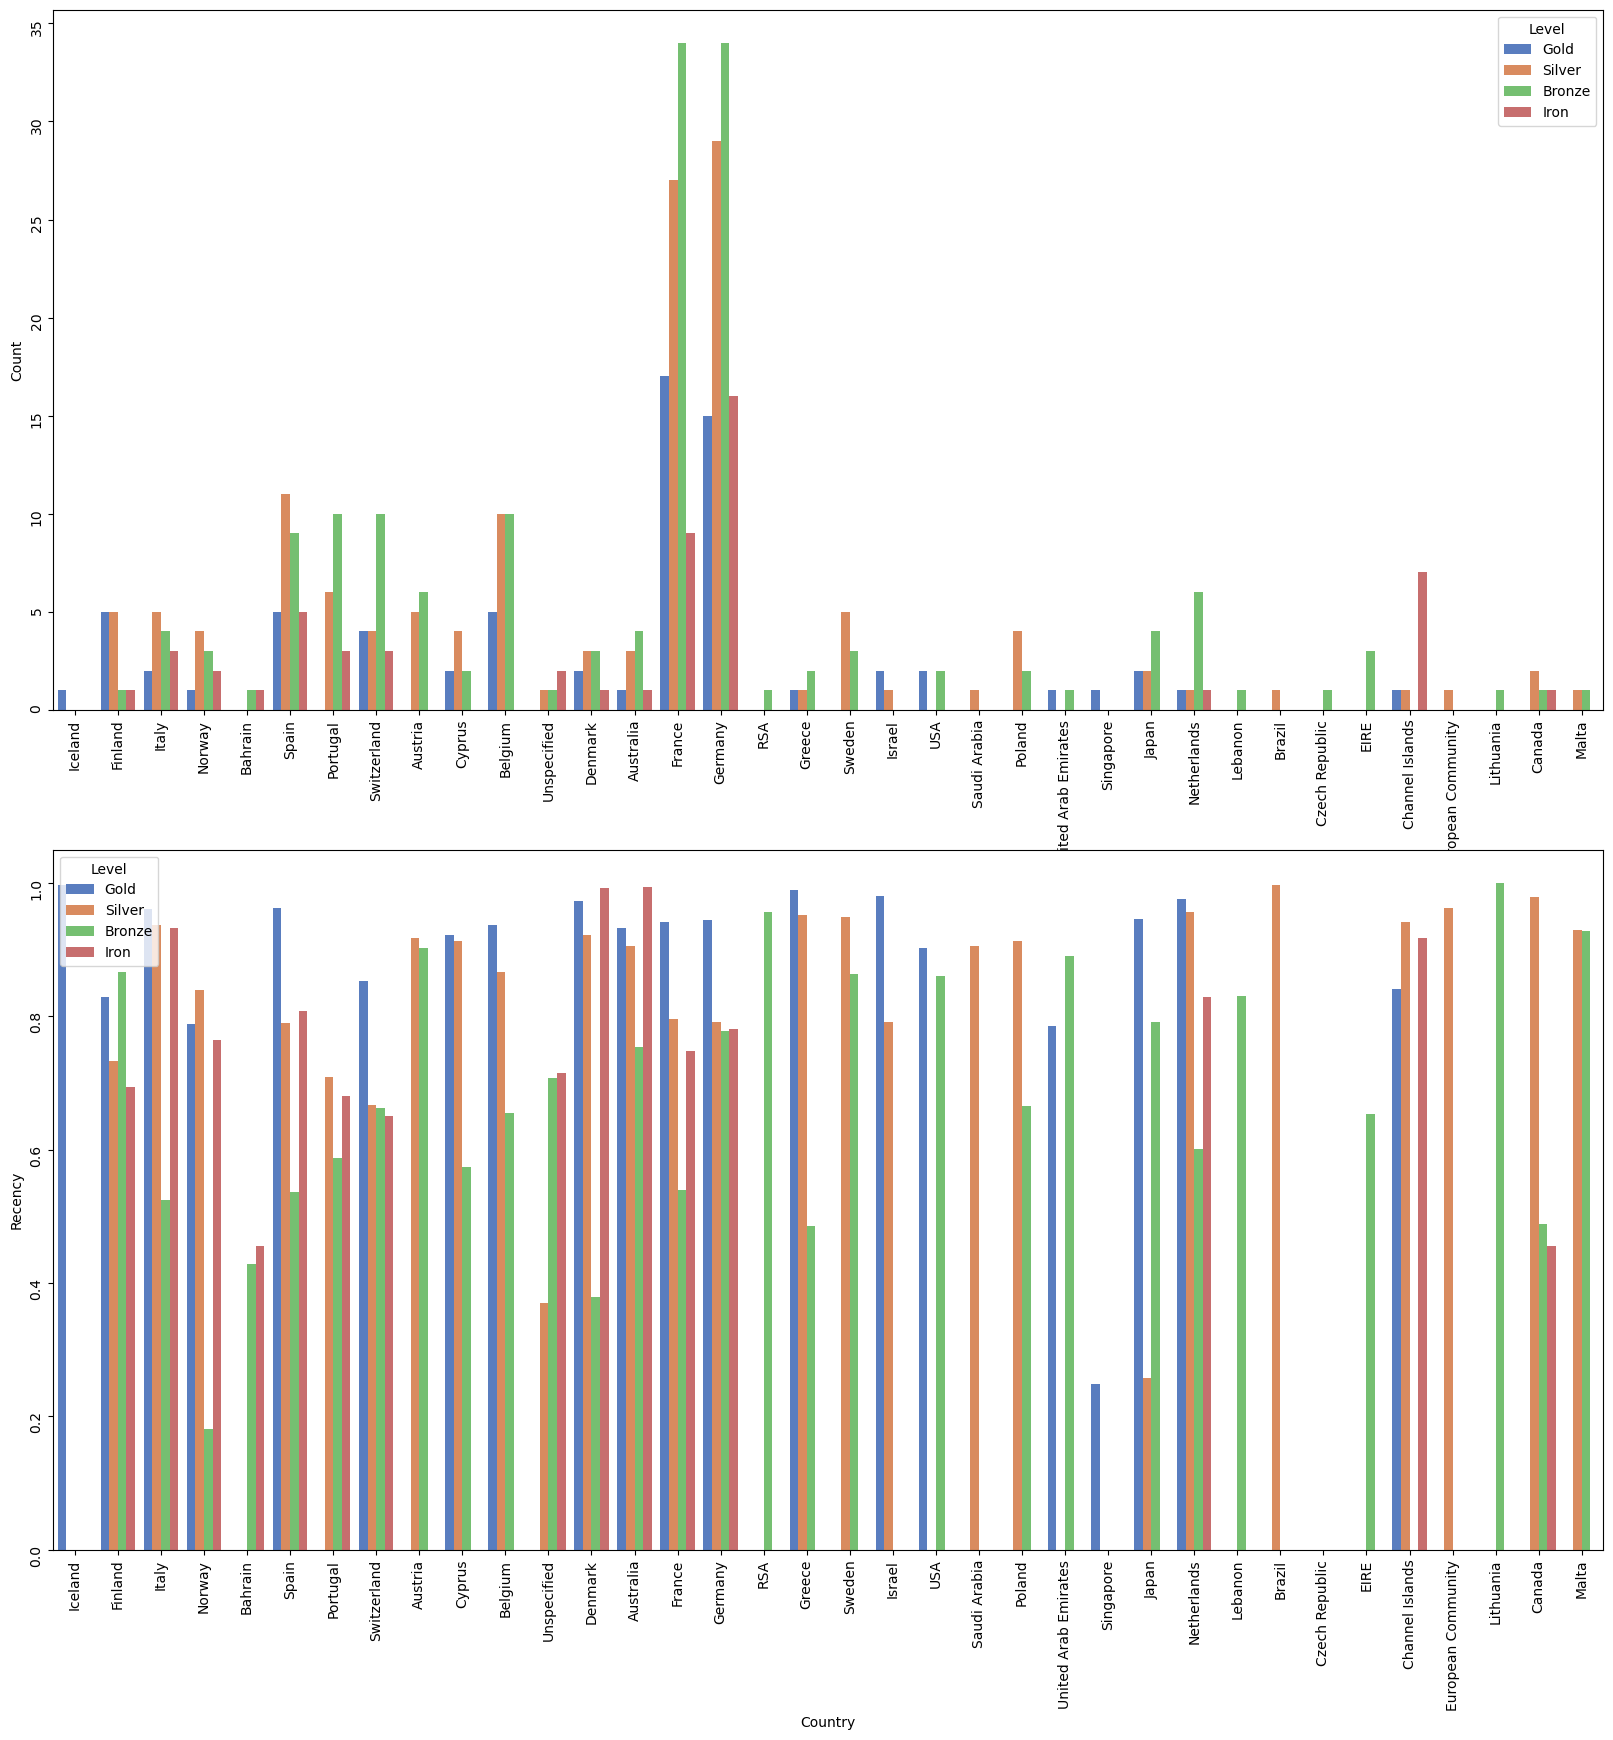

In [46]:
fig, axes = plt.subplots(2, 1, figsize=(20, 20))

sns.countplot(ax=axes[0], x='Country', hue='Level', data=rfm_without_uk, palette='muted')
axes[0].set_ylabel('Count')
axes[0].tick_params(rotation=90)  

sns.barplot(ax=axes[1], x='Country', y='Recency', hue='Level', data=rfm_without_uk, palette='muted', errorbar=None)
axes[1].tick_params(rotation=90)  

plt.show()

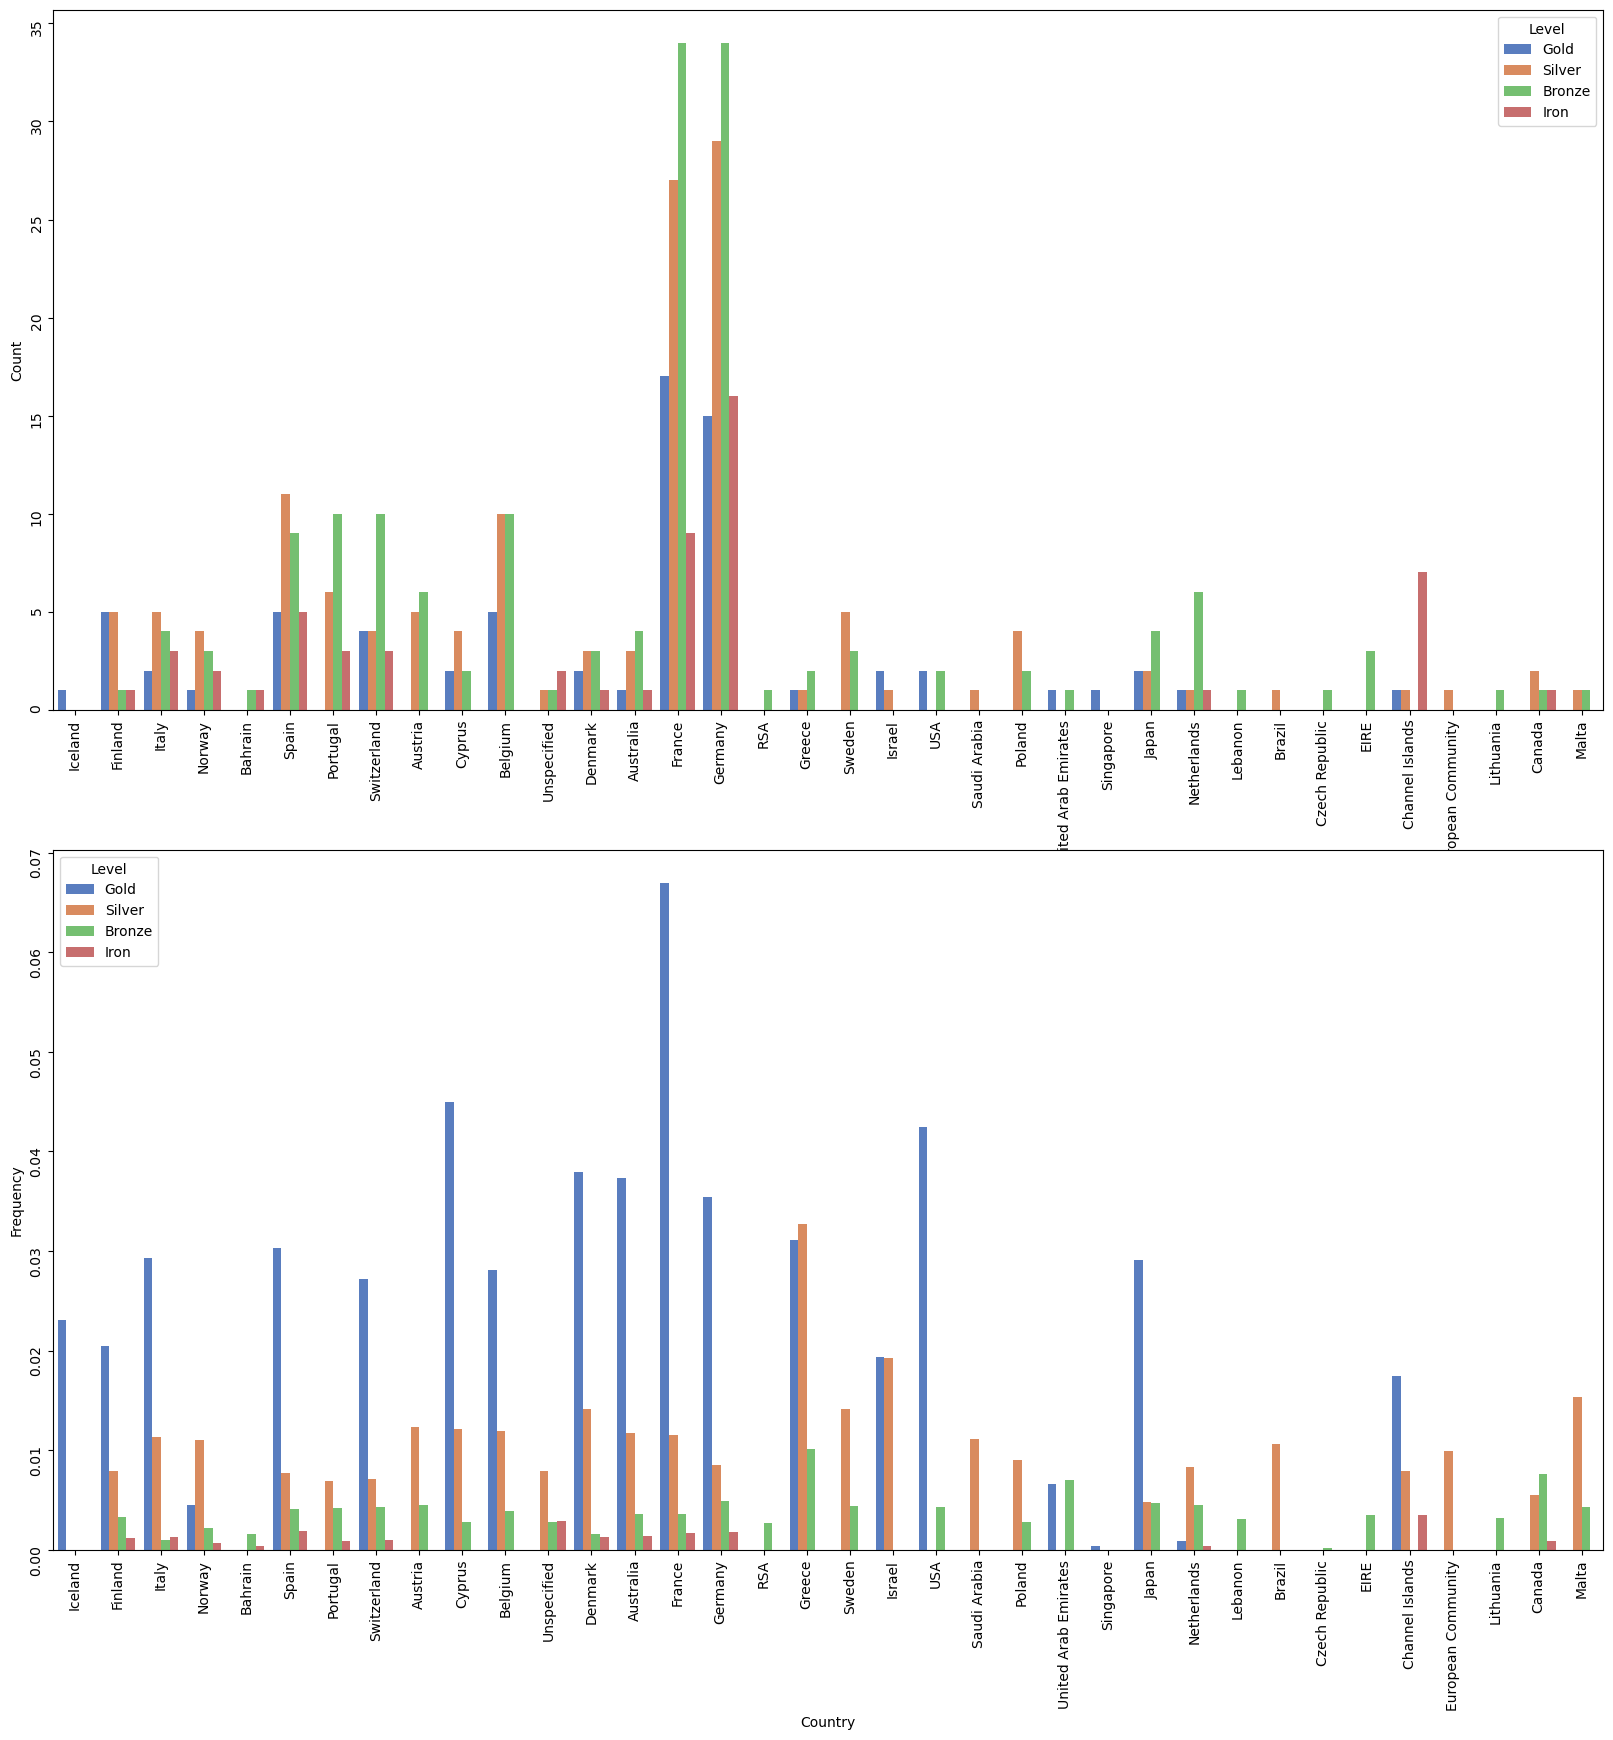

In [47]:
fig, axes = plt.subplots(2, 1, figsize=(20, 20))

sns.countplot(ax=axes[0], x='Country', hue='Level', data=rfm_without_uk, palette='muted')
axes[0].set_ylabel('Count')
axes[0].tick_params(rotation=90)  

sns.barplot(ax=axes[1], x='Country', y='Frequency', hue='Level', data=rfm_without_uk, palette='muted', errorbar=None)
axes[1].tick_params(rotation=90)  

plt.show()